In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [2]:
data = pd.read_csv('Files/data_unique.csv')
data.drop(columns=['UserId'], inplace=True)
data

,No Of Abuse Report,No Of Rejected Friend Requests,No Of Friend Requests Thar Are Not Accepted,No Of Friends,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
0,765,896,112,755,277,654,88,0
1,255,484,771,501,315,23,80,1
2,63,42,136,931,752,564,20,0
3,841,734,982,815,688,284,920,0
4,594,935,934,694,117,304,432,0
...,...,...,...,...,...,...,...,...
10006,145,633,210,100,188,631,424,1
10007,456,692,242,367,131,482,56,0
10008,70,37,616,274,702,513,59,0
10009,229,868,140,806,600,783,250,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10011 entries, 0 to 10010
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   No Of Abuse Report                           10011 non-null  int64
 1   No Of Rejected Friend Requests               10011 non-null  int64
 2   No Of Friend Requests Thar Are Not Accepted  10011 non-null  int64
 3   No Of Friends                                10011 non-null  int64
 4   No Of Followers                              10011 non-null  int64
 5   No Of Likes To Unknown Account               10011 non-null  int64
 6   No Of Comments Per Day                       10011 non-null  int64
 7   Fake Or Not Category                         10011 non-null  int64
dtypes: int64(8)
memory usage: 625.8 KB


In [4]:
data.isna().sum()

No Of Abuse Report                             0
No Of Rejected Friend Requests                 0
No Of Friend Requests Thar Are Not Accepted    0
No Of Friends                                  0
No Of Followers                                0
No Of Likes To Unknown Account                 0
No Of Comments Per Day                         0
Fake Or Not Category                           0
dtype: int64

In [5]:
data['Fake Or Not Category'].unique()

array([0, 1], dtype=int64)

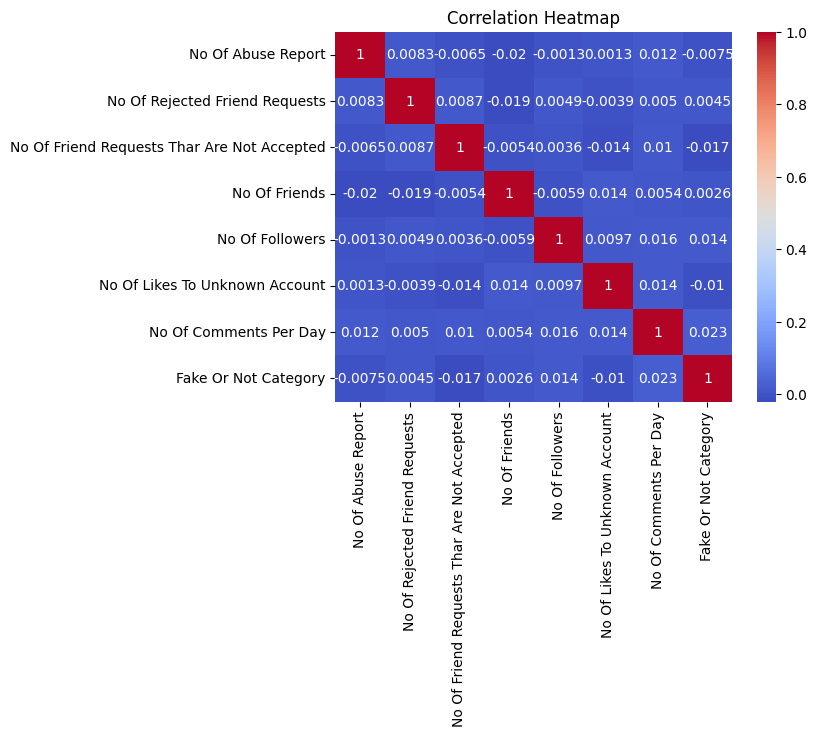

In [6]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

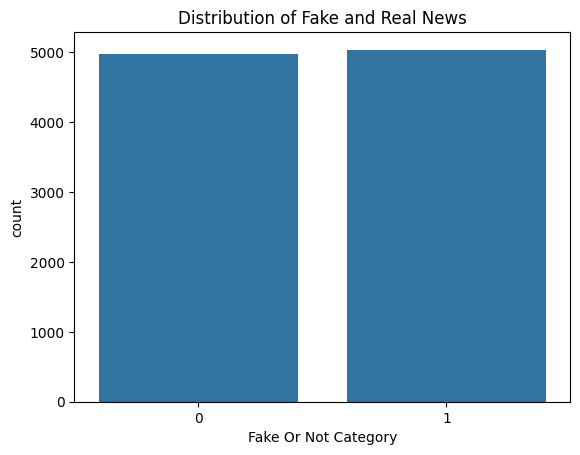

In [7]:
sns.countplot(x='Fake Or Not Category', data=data)
plt.title('Distribution of Fake and Real News')
plt.show()

In [8]:
## feature selection
X = data.drop(['Fake Or Not Category'], axis=1)
y = data['Fake Or Not Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
## random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Feature Importances: {rf.feature_importances_}')
print(f'Random Forest Feature Importances: {X.columns[rf.feature_importances_ > 0]}')

Random Forest Accuracy: 0.50
Random Forest Feature Importances: [0.14399599 0.14291703 0.14147875 0.14347005 0.14308109 0.14202656
 0.14303053]
Random Forest Feature Importances: Index(['No Of Abuse Report', 'No Of Rejected Friend Requests',
       'No Of Friend Requests Thar Are Not Accepted', 'No Of Friends',
       'No Of Followers', 'No Of Likes To Unknown Account',
       'No Of Comments Per Day'],
      dtype='object')


In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')

Logistic Regression Accuracy: 0.50


In [10]:
dt = DecisionTreeClassifier()   
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

Decision Tree Accuracy: 0.49


### 2nd dataset

https://www.kaggle.com/datasets/iamamir/social-media-train

In [11]:
data = pd.read_csv('Files/social_media_train.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,sim_name_username,len_desc,extern_url,private,num_posts,num_followers,num_following
0,0,Yes,0.27,0,0.00,No match,53,No,No,32,1000,955
1,0,Yes,0.00,2,0.00,Partial match,44,No,No,286,2740,533
2,0,Yes,0.10,2,0.00,Partial match,0,No,Yes,13,159,98
3,0,Yes,0.00,1,0.00,Partial match,82,No,No,679,414,651
4,0,Yes,0.00,2,0.00,No match,0,No,Yes,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,Yes,0.55,1,0.44,No match,0,No,No,33,166,596
572,1,Yes,0.38,1,0.33,Partial match,21,No,No,44,66,75
573,1,Yes,0.57,2,0.00,Partial match,0,No,No,4,96,339
574,1,Yes,0.57,1,0.00,Partial match,11,No,No,0,57,73


In [12]:
data.sim_name_username.unique()

array(['No match', 'Partial match', 'Full match'], dtype=object)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fake                   576 non-null    int64  
 1   profile_pic            576 non-null    object 
 2   ratio_numlen_username  576 non-null    float64
 3   len_fullname           576 non-null    int64  
 4   ratio_numlen_fullname  576 non-null    float64
 5   sim_name_username      576 non-null    object 
 6   len_desc               576 non-null    int64  
 7   extern_url             576 non-null    object 
 8   private                576 non-null    object 
 9   num_posts              576 non-null    int64  
 10  num_followers          576 non-null    int64  
 11  num_following          576 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 54.1+ KB


In [14]:
data.isna().sum()

fake                     0
profile_pic              0
ratio_numlen_username    0
len_fullname             0
ratio_numlen_fullname    0
sim_name_username        0
len_desc                 0
extern_url               0
private                  0
num_posts                0
num_followers            0
num_following            0
dtype: int64

In [15]:
data.fake.unique()

array([0, 1], dtype=int64)

In [16]:
LE_PP = LabelEncoder()
data['profile_pic'] = LE_PP.fit_transform(data['profile_pic'])
LE_UN = LabelEncoder()
data['sim_name_username'] = LE_UN.fit_transform(data['sim_name_username'])
LE_URL = LabelEncoder()
data['extern_url'] = LE_URL.fit_transform(data['extern_url'])
LE_P = LabelEncoder()
data['private'] = LE_P.fit_transform(data['private'])

In [17]:
data

,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,sim_name_username,len_desc,extern_url,private,num_posts,num_followers,num_following
0,0,1,0.27,0,0.00,1,53,0,0,32,1000,955
1,0,1,0.00,2,0.00,2,44,0,0,286,2740,533
2,0,1,0.10,2,0.00,2,0,0,1,13,159,98
3,0,1,0.00,1,0.00,2,82,0,0,679,414,651
4,0,1,0.00,2,0.00,1,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,1,0.55,1,0.44,1,0,0,0,33,166,596
572,1,1,0.38,1,0.33,2,21,0,0,44,66,75
573,1,1,0.57,2,0.00,2,0,0,0,4,96,339
574,1,1,0.57,1,0.00,2,11,0,0,0,57,73


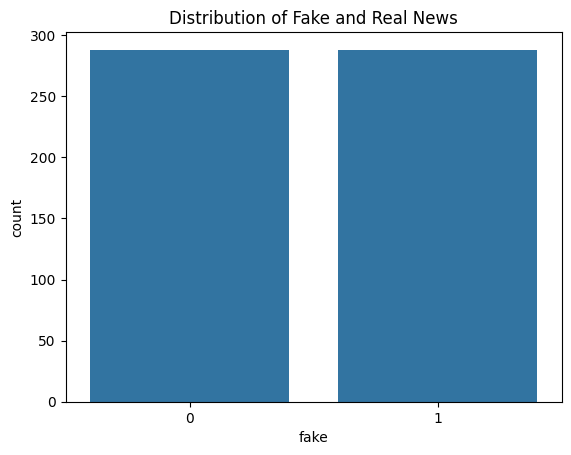

In [18]:
sns.countplot(x='fake', data=data)
plt.title('Distribution of Fake and Real News')
plt.show()

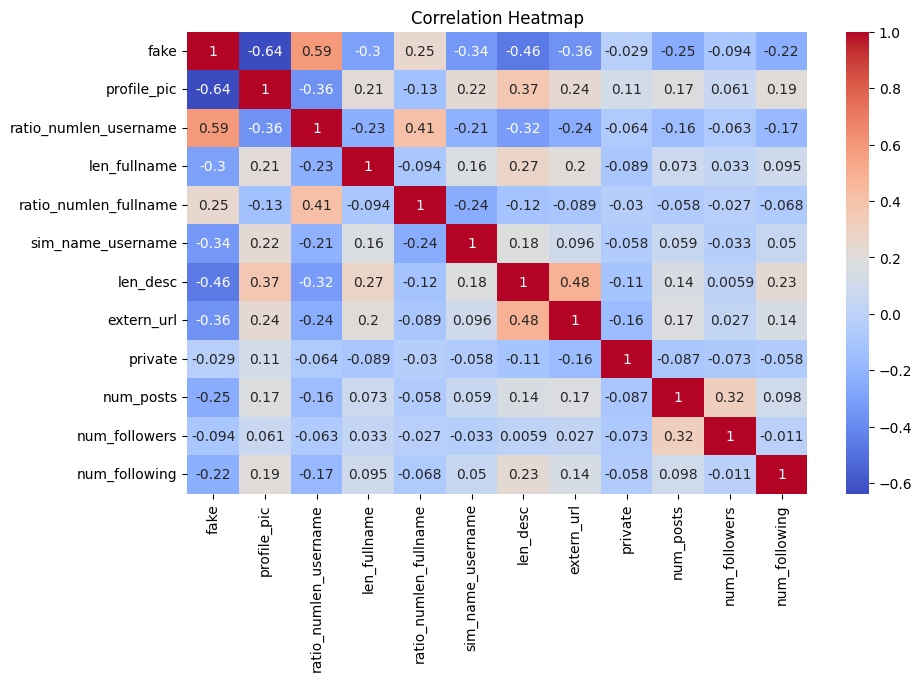

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
data.drop(columns=['private','ratio_numlen_fullname','num_followers','num_following','num_posts','len_fullname'], inplace=True)

In [21]:
data

,fake,profile_pic,ratio_numlen_username,sim_name_username,len_desc,extern_url
0,0,1,0.27,1,53,0
1,0,1,0.00,2,44,0
2,0,1,0.10,2,0,0
3,0,1,0.00,2,82,0
4,0,1,0.00,1,0,0
...,...,...,...,...,...,...
571,1,1,0.55,1,0,0
572,1,1,0.38,2,21,0
573,1,1,0.57,2,0,0
574,1,1,0.57,2,11,0


In [22]:
## feature selection
X = data.drop(['fake'], axis=1)
y = data['fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

In [23]:
## random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Classification Report:\n{classification_report_rf}')

Random Forest Accuracy: 0.86
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        29
           1       0.82      0.93      0.87        29

    accuracy                           0.86        58
   macro avg       0.87      0.86      0.86        58
weighted avg       0.87      0.86      0.86        58



In [24]:
dt = DecisionTreeClassifier()   
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print(f'Decision Tree Classification Report:\n{classification_report_dt}')

Decision Tree Accuracy: 0.90
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.87      0.93      0.90        29

    accuracy                           0.90        58
   macro avg       0.90      0.90      0.90        58
weighted avg       0.90      0.90      0.90        58



In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print(f'Logistic Regression Classification Report:\n{classification_report_lr}')

Logistic Regression Accuracy: 0.90
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.90      0.90      0.90        29

    accuracy                           0.90        58
   macro avg       0.90      0.90      0.90        58
weighted avg       0.90      0.90      0.90        58



In [26]:
## save the model
with open('Files/FP_dt_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

with open('Files/LEPP_model.pkl', 'wb') as file:
    pickle.dump(LE_PP, file)
with open('Files/LEUN_model.pkl', 'wb') as file:
    pickle.dump(LE_UN, file)
with open('Files/LEURL_model.pkl', 'wb') as file:
    pickle.dump(LE_URL, file)